In [34]:
# imported libraries
import pandas as pd
import seaborn as sb
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import demoji
import re
import string

In [35]:
df = pd.read_csv('MngKargo_Tweets.csv')

In [36]:
df.head() # by deafult gives us first 5 rows

,Unnamed: 0,Date,User,Tweet
0,0,2022-09-30 21:56:39+00:00,GzmDuman58,Kargo şirketlerinde başkasının kargosunu alma ...
1,1,2022-09-30 12:25:59+00:00,maskeli___balo,@MNGKargoDestek @mngkargo İade kodumun bugün s...
2,2,2022-09-30 12:11:14+00:00,maskeli___balo,Talepleri müşteri hizmetleri de iletti günlerc...
3,3,2022-09-30 08:48:56+00:00,tzn1903,Evet Çarşamba günü şubeniz(Sefaköy)de olan kar...
4,4,2022-09-30 07:13:58+00:00,brahimA53632892,#mngkargo ile yaşlı ve yürümekte zorluk yasay...


In [37]:
df.rename(columns={'Unnamed: 0':'index'},inplace=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9571 entries, 0 to 9570
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   9571 non-null   int64 
 1   Date    9571 non-null   object
 2   User    9571 non-null   object
 3   Tweet   9571 non-null   object
dtypes: int64(1), object(3)
memory usage: 299.2+ KB


In [39]:
df['wordcount_before_cleaning'] = df['Tweet'].map(lambda x:len(x.split()))

In [40]:
df.head()

,index,Date,User,Tweet,wordcount_before_cleaning
0,0,2022-09-30 21:56:39+00:00,GzmDuman58,Kargo şirketlerinde başkasının kargosunu alma ...,31
1,1,2022-09-30 12:25:59+00:00,maskeli___balo,@MNGKargoDestek @mngkargo İade kodumun bugün s...,30
2,2,2022-09-30 12:11:14+00:00,maskeli___balo,Talepleri müşteri hizmetleri de iletti günlerc...,31
3,3,2022-09-30 08:48:56+00:00,tzn1903,Evet Çarşamba günü şubeniz(Sefaköy)de olan kar...,30
4,4,2022-09-30 07:13:58+00:00,brahimA53632892,#mngkargo ile yaşlı ve yürümekte zorluk yasay...,32


Word Distribution Before cleaning Tweets('@','#','https://...',...)

In [41]:
pd.DataFrame(df['wordcount_before_cleaning'].describe()).T

,count,mean,std,min,25%,50%,75%,max
wordcount_before_cleaning,9571.0,21.378121,10.081531,2.0,13.0,21.0,30.0,51.0


<AxesSubplot: xlabel='wordcount_before_cleaning', ylabel='Count'>

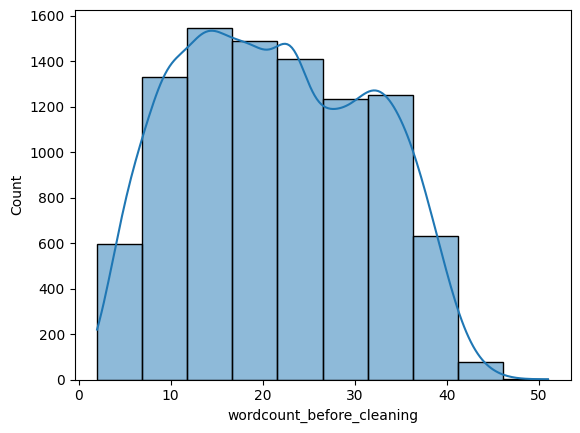

In [42]:
sb.histplot(data=df['wordcount_before_cleaning'],bins=10,kde=True)

Cleaning Tweets

In [43]:
def clean_tweets(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r'@\w+|\#','',tweet) # this is for removing # and @ mentions 
    tweet= tweet.translate(str.maketrans("","",string.punctuation))
    tweet = re.sub(r"http\s+|www\S+|https\S+","",tweet,flags=re.MULTILINE) # removing https links 
    tweet = demoji.replace(tweet,"")
    tweet = re.sub('\n',' ',tweet) # remove \n
    return tweet

In [44]:
df['cleanTweets'] = df['Tweet'].map(clean_tweets)

In [45]:
df['wordcount_after_cleaning'] = df['cleanTweets'].map(lambda x:len(x.split()))

In [46]:
df.head()

,index,Date,User,Tweet,wordcount_before_cleaning,cleanTweets,wordcount_after_cleaning
0,0,2022-09-30 21:56:39+00:00,GzmDuman58,Kargo şirketlerinde başkasının kargosunu alma ...,31,kargo şirketlerinde başkasının kargosunu alma ...,29
1,1,2022-09-30 12:25:59+00:00,maskeli___balo,@MNGKargoDestek @mngkargo İade kodumun bugün s...,30,i̇ade kodumun bugün son günü olduğunu belirt...,27
2,2,2022-09-30 12:11:14+00:00,maskeli___balo,Talepleri müşteri hizmetleri de iletti günlerc...,31,talepleri müşteri hizmetleri de iletti günlerc...,30
3,3,2022-09-30 08:48:56+00:00,tzn1903,Evet Çarşamba günü şubeniz(Sefaköy)de olan kar...,30,evet çarşamba günü şubenizsefaköyde olan kargo...,28
4,4,2022-09-30 07:13:58+00:00,brahimA53632892,#mngkargo ile yaşlı ve yürümekte zorluk yasay...,32,mngkargo ile yaşlı ve yürümekte zorluk yasaya...,32


In [47]:
pd.DataFrame(df['wordcount_after_cleaning'].describe()).T

,count,mean,std,min,25%,50%,75%,max
wordcount_after_cleaning,9571.0,20.138126,9.908555,2.0,12.0,19.0,28.0,51.0


In [48]:
df.describe()

,index,wordcount_before_cleaning,wordcount_after_cleaning
count,9571.000000,9571.000000,9571.000000
mean,4785.000000,21.378121,20.138126
std,2763.054047,10.081531,9.908555
min,0.000000,2.000000,2.000000
25%,2392.500000,13.000000,12.000000
50%,4785.000000,21.000000,19.000000
75%,7177.500000,30.000000,28.000000
max,9570.000000,51.000000,51.000000


<AxesSubplot: xlabel='wordcount_after_cleaning', ylabel='Count'>

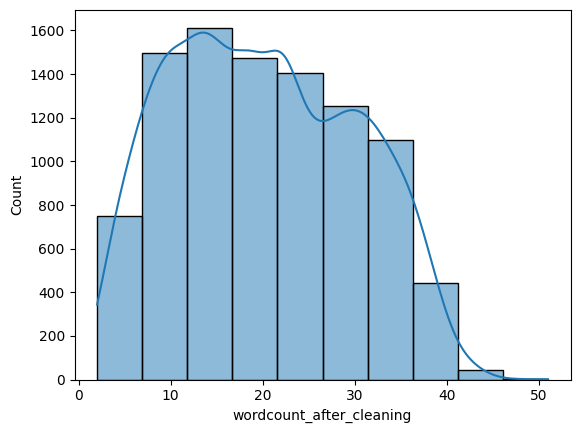

In [49]:
sb.histplot(data=df['wordcount_after_cleaning'],bins=10,kde=True)

In [50]:
df.head()

,index,Date,User,Tweet,wordcount_before_cleaning,cleanTweets,wordcount_after_cleaning
0,0,2022-09-30 21:56:39+00:00,GzmDuman58,Kargo şirketlerinde başkasının kargosunu alma ...,31,kargo şirketlerinde başkasının kargosunu alma ...,29
1,1,2022-09-30 12:25:59+00:00,maskeli___balo,@MNGKargoDestek @mngkargo İade kodumun bugün s...,30,i̇ade kodumun bugün son günü olduğunu belirt...,27
2,2,2022-09-30 12:11:14+00:00,maskeli___balo,Talepleri müşteri hizmetleri de iletti günlerc...,31,talepleri müşteri hizmetleri de iletti günlerc...,30
3,3,2022-09-30 08:48:56+00:00,tzn1903,Evet Çarşamba günü şubeniz(Sefaköy)de olan kar...,30,evet çarşamba günü şubenizsefaköyde olan kargo...,28
4,4,2022-09-30 07:13:58+00:00,brahimA53632892,#mngkargo ile yaşlı ve yürümekte zorluk yasay...,32,mngkargo ile yaşlı ve yürümekte zorluk yasaya...,32


In [51]:
for i in list(df.sample(15, random_state=1).index):
    print(df.loc[i]['cleanTweets'])

mngkargo zamaninda gelemeyen kargoya mng kargo denir gidip subeden arkadaslar yorulmasin diye almaniz gerekir 
 cumartesi halkalı şubeye gelen kargo salı oldu halen halkalı ev adresime gelmedi mngkargo
sizin acil kargo ücreti alıp kargoyu hala getirmemeniz nasıl bir rezilliktir  1 kişiye ulaşamıyorum  arayıp  mngkargo
mngkargo 29 nisanda gebzeden kargoya verilen ürün  7 mayıs olmasına rağmen aynı il içindeki körfez ilçesine gelmedi üstüne muhatap bulamıyorsunuz arıyorsunuz açan yok rezalet tavan yapmış ayıp ayıp
telefonlara bakmayacaksa subelerinizin numaralarını yazmayın hicbiryere istinye subenizi 30 kez aradım rezillik    mngkargo     mngkargo
 nerede krediler nerede olumsuzda olsa cvplar pandemi bitti survivor2020 mngkargo kimjongun i̇ftarvakti sesimize ses olun
şube müdürleri daha fazla kargo için  çalışanlara mobbing yapıyor kargo işçi kargoişçileri kargoçalışanları kurye şoför uzunyol işçihakları  kargoiscileritoplulugu kargoçalışanlarınıntaleplerikabuledilsin yurticikargo mngka

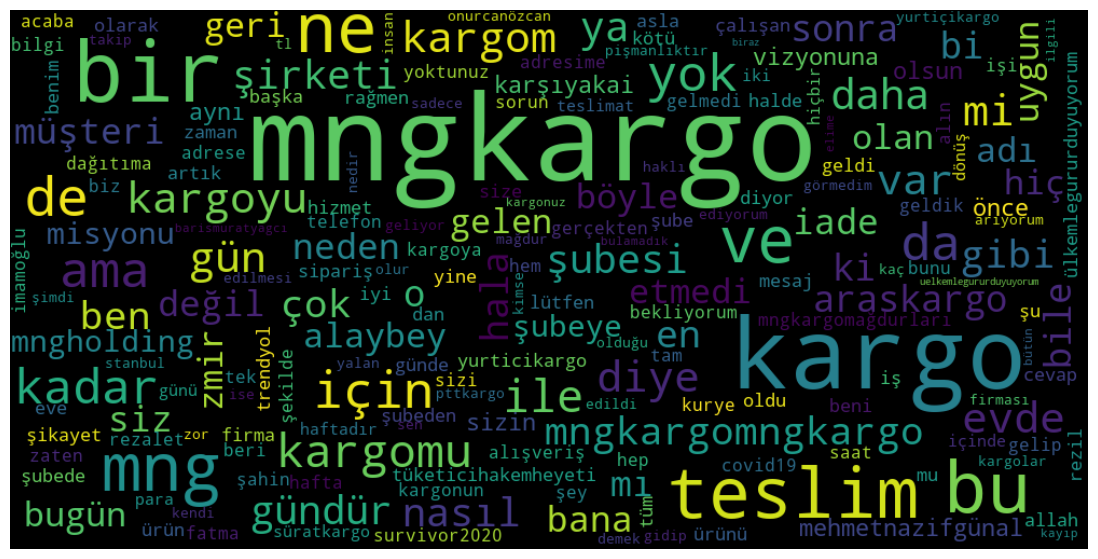

In [53]:
# ploting word cloud

allWords = ''.join([twts for twts in df['cleanTweets']])
wordCloud = WordCloud(width= 1000,height=500,random_state=35,max_font_size=110,collocations=False).generate(allWords)

figure = plt.figure(figsize=(15,7))
plt.imshow(wordCloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()